# **Tópicos Especiais II (C318)**

### Curso: Fundamentos de Machine Learning
### Projeto Computacional - Análise e Modelagem - Dataframe: Heart Failure Prediction Dataset


**Alunos:** Ana Luiza Silva Terra, Igor Rufino Ribeiro, Paulo Gabriel de Freitas Rotundaro

**Professor:** Ricardo Augusto

-------------------------------------------------------------------------------------------------------------------------------

## **Contexto**

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro entre cinco mortes por CVD são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum causado por DCV e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca.

Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e tratamentos precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

### **Objetivo:**
Prever se uma pessoa, a partir de parâmetros de clínicos, tem tendência a ter insuficiência cardíaca.

### **Regras de Negócio:**
- É possível prever que um indivíduo pode possuir insuficiência cardíaca com base em dados médicos de forma automatizada, sem supervisão profissional?

- Qual o principal parâmetro associado à doença cardíaca?

- Existe uma tendência maior em algum gênero ou faixa etária?

### **Tipo de problema:**
Classificação Binária

### **Enquadramento:**
Aprendizagem supervisionada (saída é conhecida).

## **Análise exploratória de dados**

##### Bibliotecas utilizadas no projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

##### Importação da base de dados

In [2]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Obtendo informações sobre o dataframe:

In [3]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##### Informações sobre o dataset:

**Fonte:**

Este conjunto de dados foi criado combinando diferentes conjuntos de dados já disponíveis de forma independente, mas não combinados antes. Neste conjunto de dados, 5 conjuntos de dados cardíacos são combinados em 11 recursos comuns, o que o torna o maior conjunto de dados de doenças cardíacas disponível até agora para fins de pesquisa. Os cinco conjuntos de dados usados para sua curadoria são:

- Cleveland: 303 observações
- Húngaro: 294 observações
- Suíça: 123 observações
- Long Beach VA: 200 observações
- Conjunto de dados Stalog (coração): 270 observações
- Total: 1190 observações
- Duplicado: 272 observações

Conjunto de dados final: 918 observações

**Atributos:**

| Atributo | Descrição | Valores |
|--- |--- |--- |
| Age | Faixa etária dos participantes da pesquisa | 28 a 77 |
| Sex | Sexo dos pacientes | M: Male, F: Female |
| ChestPainType | Tipo de dor no peito | TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática |
| RestingBP | Pressão arterial em repouso | mm/Hg |
| Cholesterol | Colesterol sérico | mm/dl |
| FastingBS | Açúcar no sangue em jejum | 1: se FastingBS > 120 mg/dl, 0: caso contrário |
| RestingECG | Resultados do eletrocardiograma em repouso | Normal: Normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes |
| MaxHR | Frequência cardíaca máxima atingida | 60 a 202 |
| ExerciseAngina | Angina (dor no peito) induzida por exercício | Y: Sim, N: Não |
| Oldpeak | Depressão de ST induzida pelo exercício em relação ao repouso | -2.6 a 6.2 |
| ST_Slope | Inclinação de pico do segmento ST em exercício | Up: ascendente, Flat: plano, Down: descendente |
| HeartDisease | Classe de saída | 1: doença cardíaca, 0: normal |

## Preparação dos Dados - Manipulando features categóricas

Normalização das variáveis categóricas para valores numéricos com **LabelEncoder**.


In [5]:
lbl=LabelEncoder()
categorical=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
for i in categorical:
    df[i]=lbl.fit_transform(df[i])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## Informações iniciais 

Gerando estatisticas em cima das variáveis numéricas, no caso apenas a variável idade.

In [6]:
# Descrição estatística do atributo Age
df["Age"].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

Observações:
- Média de idade das pessoas que participaram da pesquisa é igual a 53 anos.
- A idade mínima de um paciente foi 28 anos
- A idade máxima de um paciente foi 77 anos
- 25% da população (mais nova) analisada possui entre 28 e 39 anos
- 25% da população (mais velha) analisada possui entre 57 e 77 anos

É importante ressaltar que a feature Sexo foi a que mais apresentou divergência na quantidade de pessoas (725 pessoas pertencentes ao sexo Masculino e 193 ao sexo Feminino). E isso pode acabar impactando na correlação da feature com a variável target.

In [7]:
print(df["Sex"].value_counts())

1    725
0    193
Name: Sex, dtype: int64


Levando isso em consideração, é imprescindível analisar a variável target a fim de validar se o classificador não tende a ficar inclinado a uma resposta específica:

In [8]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Pode-se observar que os resultados estão bem ditribuidos em termos de quantidade e com essa distribuição o classificador não será tendencioso.

Plotando histograma da variável idade em cima de uma amostra da população total:

Text(0, 0.5, 'Quantidade de pessoas')

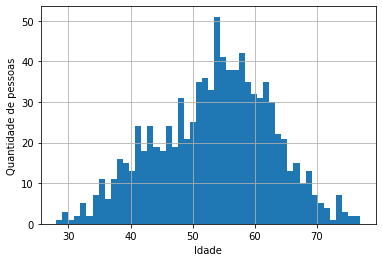

In [9]:
df["Age"].hist(bins = 50)
plt.xlabel("Idade")
plt.ylabel("Quantidade de pessoas")

É apresentada uma estimativa empírica (em cima da amostra), a fim de apresentar a variação da quantidade de pessoas presentes de acordo com a idade de cada uma.

Mas utilizando a biblioteca **Klib**, podemos mostrar a Densidade de Probabilidade da População e sair de uma estimativa empírica:

<AxesSubplot:xlabel='Age', ylabel='Density'>

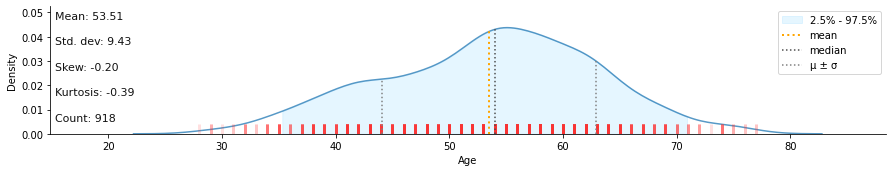

In [10]:
klib.dist_plot(df["Age"])

É possivel a partir disso:
- Realizar inferências estatísticas
- Verificar o quão assimétrico estão os dados (skew)
- Verificar o quão achatada se encontra a distribuição (Kurtosis)
- Verificar a média de idade

Ainda podemos estender a análise da densidade de probabilidade para apenas quem possui problemas cardíacos:

<AxesSubplot:xlabel='Age', ylabel='Density'>

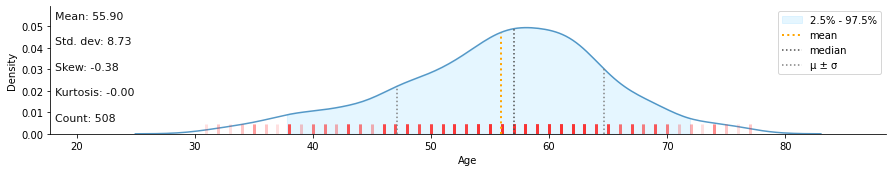

In [11]:
df_positive = df[(df["HeartDisease"]==1)]
klib.dist_plot(df_positive["Age"])

A média de idade das pessoas que possuem problemas cardíacos é de 56 anos, e 508 pessoas possuem essa condição

Para as pessoas que não possuem problemas cardíacos:

<AxesSubplot:xlabel='Age', ylabel='Density'>

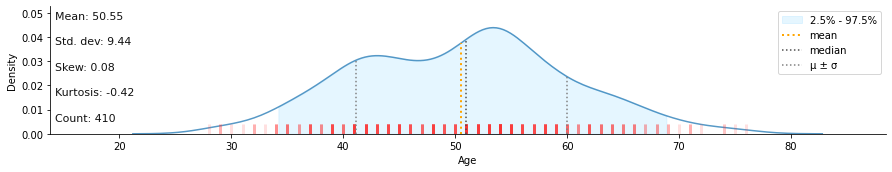

In [12]:
df_negative = df[(df["HeartDisease"]==0)]
klib.dist_plot(df_negative["Age"])

A média de idade das pessoas que não problemas cardíacos é de 50 anos, e 410 pessoas não possuem essa condição

## Amostragem 

A amostragem é um ponto essencial para um projeto de ML, e consiste em separar o conjunto de dados de treino e dados de teste.
- Dados de treinamento: são usados para o treinamento do modelo de machine learning.
- Dados de teste: são usados para comprovar o funcionamento do modelo de machine learning. Após a criação e o treinamento do modelo, os dados de teste serão usados para simular verificações reais para validar o modelo.

O método de amostragem empregada foi usando a função do SciKit Learn train_test_split, que cria uma amostragem aleatória simples. Assim, 20% do conjunto de dados foram reservados para teste e o restante para treino. Essa seleção é feita de forma aleatória, mas com a semente do gerador de número aleatório com o valor em 99, para que ao executar o código novamente, os conjuntos permaneçam os mesmos.


In [13]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 99)
print(f"Tamanho conjunto de treino: {len(train_set)}")
print(f"Tamanho conjunto de teste: {len(test_set)}")

Tamanho conjunto de treino: 734
Tamanho conjunto de teste: 184


## Investigando Correlações

Será analisado o dataframe de treino. Objetivo de conhecer o dados e detectar as melhores variáveis para se trabalhar.

Para realizar a análise exploratória dos dados foi utilizado o coeficiente de correlação de Pearson (p). Esse coeficiente de correlação assume valores de -1 a 1, medindo apenas correlações lineares. 

- Quando o coeficiente está próximo de 1, significa que existe uma forte correlação positiva. 
- Quando o coeficiente está próximo de -1, significa que existe uma forte correlação negativa. 
- Quando o coeficiente está próximo de 0, significam que não há correlação linear.



In [14]:
correlation_matrix = train_set.corr(method='pearson')

<AxesSubplot:>

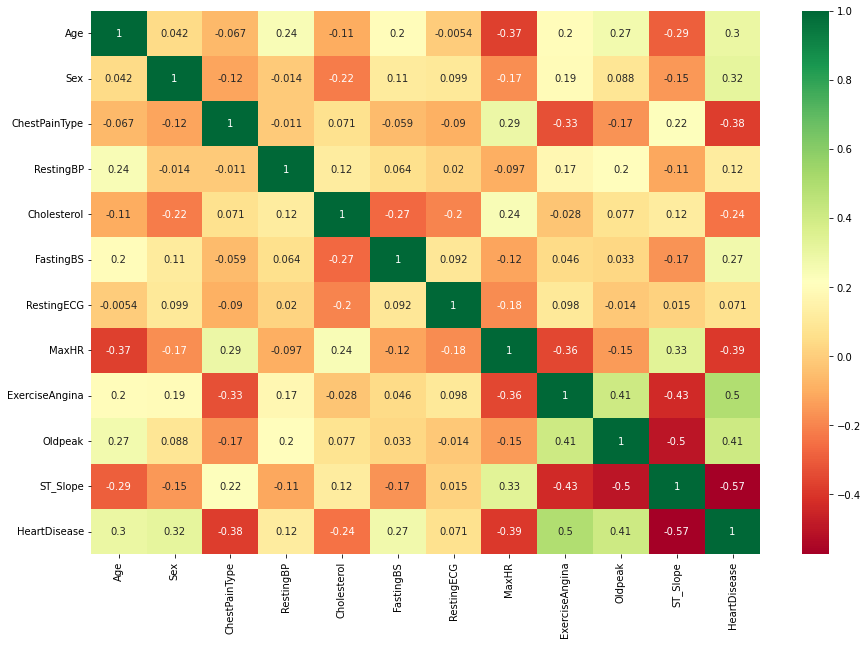

In [15]:
plt.figure(figsize=(15,10))
top_corr_features = correlation_matrix.index
sns.heatmap(correlation_matrix[top_corr_features],annot=True,cmap="RdYlGn")

Aqui está a matriz de correlação para nosso conjunto de treino. Então temos a correlação de cada variável com todos outras (podemos desconsiderar a diagonal principal, porque é a correlação da variável com ela mesma).

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

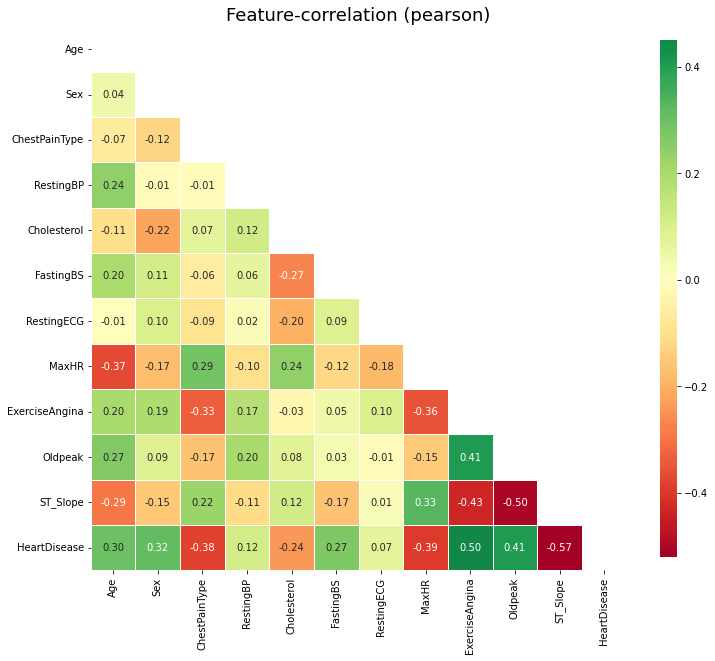

In [16]:
klib.corr_plot(train_set, cmap="RdYlGn")

Nessa outra imagem, temos uma versão simplificada da matriz de correlação, eliminando valores espelhados e a diagonal principal.

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

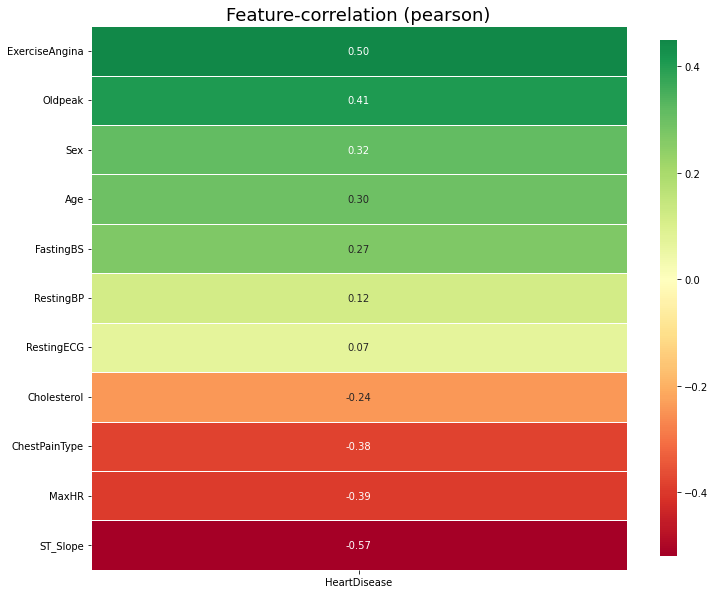

In [17]:
klib.corr_plot(train_set, target="HeartDisease", cmap="RdYlGn")

Como o foco é a relação de uma variável de entrada com a variável de saída, vamos analisar essa outra imagem, onde é exibido apenas as correlações com a variável de saída, de forma ordenada, para facilitar a visualização.

Podemos perceber que ExerciseAngina possui uma correlação positiva relativamente alta. Assim, esse sintoma é considerado mais presente em pessoas com diabetes.

Oldpeak, Sex, Age e FastingBS também possuem valores significativos, mas menores em valor absoluto.

## **Modelagem**

Um classificador random forest pode ser utilizado para computar a importância das features.

Random Forest é um algoritmo de aprendizado de máquina popular que pertence à técnica de aprendizado supervisionado. Ele pode ser usado para problemas de Classificação e Regressão em ML. É baseado no conceito de ensemble learning, que é um processo de combinação de vários classificadores para resolver um problema complexo e melhorar o desempenho do modelo.

In [18]:
X_train = train_set.iloc[:, 0:11].to_numpy()
y_train = train_set.loc[:, "HeartDisease"].to_numpy()

In [19]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier()

RandomForestClassifier é um estimador que ajusta vários classificadores de árvore de decisão em várias sub amostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste de controle. 

As vantagens de se usar esse método: são consideradas um método altamente preciso e robusto devido ao número de árvores de decisão que participam do processo, não sofre do problema de overfitting, o algoritmo pode ser usado em problemas de classificação e regressão.

In [20]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [21]:
importances

array([0.07567618, 0.03570065, 0.11315785, 0.0716928 , 0.11647969,
       0.0231707 , 0.02434833, 0.11303908, 0.08651597, 0.12033833,
       0.21988041])

In [22]:
ts = train_set
ts = ts.drop(columns=["HeartDisease"])

[0.07567618 0.03570065 0.11315785 0.0716928  0.11647969 0.0231707
 0.02434833 0.11303908 0.08651597 0.12033833 0.21988041]
['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


Text(0, 0.5, 'FEATURE NAMES')

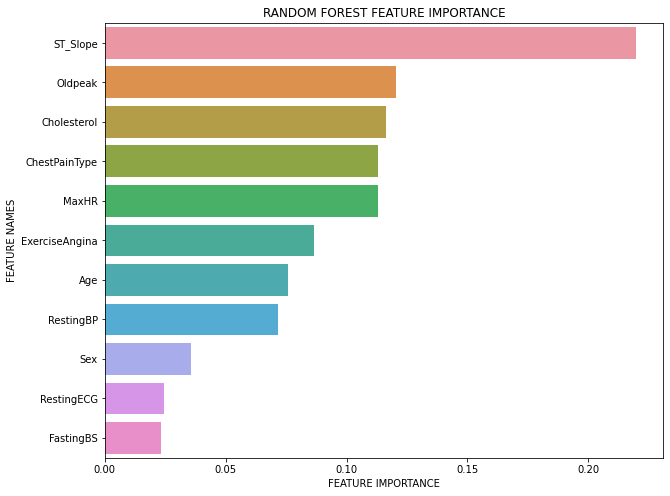

In [23]:
feature_importance = np.array(importances)
feature_names = np.array(ts.columns)
print(feature_importance)
print(feature_names)

data={"feature_names":feature_names,"feature_importance":feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=["feature_importance"], ascending=False,inplace=True)


plt.figure(figsize=(10,8))
sns.barplot(x=fi_df["feature_importance"], y=fi_df["feature_names"])

plt.title("RANDOM FOREST FEATURE IMPORTANCE")
plt.xlabel("FEATURE IMPORTANCE")
plt.ylabel("FEATURE NAMES")

Feature Importance se refere a uma classe de técnicas pra atribuir pontuações a recursos de entrada de um modelo preditivo que indica a importância relativa entre cada um dos recursos ao fazer uma previsão.
A pontuação do feature importance pode ser calculada por problemas que envolvem predição de valores numéricos, chamados regressão e de problemas que envolvem a predição de toda uma classe, chamada classificação.

No nosso trabalho estamos usando a classificação.

A feature importe permite que tenhamos uma melhor visão sobre aquele conjunto de dados, sobre o modelo e que a predição em si melhore.

O Feature Importance então vem nos falar o quão importante a variável é para a realização da predição.
Analisando o gráfico o gráfico então pode-se ver que a Poliúria e a Polidipsia são os fatores que mais aparecem em pessoas com diabetes.

Nota-se também a diferença entre os gráficos de Random Forest Feature Importance e de Feature Correlation(Pearson), uma vez que como dito, enquanto a Feature Importance é diretamente relacionado à predição, o que tem alta correlação não necessariamente significa que a predição também será alta. Um exemplo, nesse gráfico (Feature Importance) o quarto atributo, "age", apresenta maior valor do que no gráfico de correlação, dessa forma pode-se dizer que a idade é um fator que influencia diretamente pois o gráfico de Feature Importance apresenta uma maior precisão, pois como dito anteriormente, existe uma tendência maior do indivíduo desenvolver diabetes depois dos 40, sendo assim uma fonte mais segura de afirmação de dados.


In [24]:
X_test = test_set.iloc[:, 0:11].to_numpy()
y_test = test_set.loc[:, "HeartDisease"].to_numpy()

var = forest.fit(X_train,y_train) 
y_pred=forest.predict(X_test)

In [25]:
array_test = var.predict_proba(X_test)

Aqui foi-se usada a função predict_proba. 

Ela retorna as probabilidades de pertencer a classe na forma de um array.

Com ela conseguimos prever, individualmente, a probabilidade do indivíduo ter ou não diabetes, em porcentagem.
Ou seja, com base na análise do seguinte gráfico, o primeiro indivíduo tem 88% de chances de ter a doença diabetes. Fazendo assim que ele pertença a classe, por isso o número 1. Enquanto o terceiro indivíduo tem apenas 10% de chance de ter a doença, portanto não pertencendo a classe.

In [26]:
df_with_array_test = pd.DataFrame(array_test,columns=["Não ter (%)","Ter (%)"])
df_with_array_test["HeartDisease"] = y_test
df_with_array_test

,Não ter (%),Ter (%),HeartDisease
0,0.01,0.99,1
1,0.19,0.81,0
2,0.20,0.80,1
3,0.55,0.45,1
4,0.74,0.26,1
...,...,...,...
179,0.33,0.67,1
180,0.56,0.44,0
181,0.42,0.58,0
182,0.60,0.40,0


## **Avaliação de Desempenho**

### RMSE

O RMSE trata de uma medida que calcula a raiz quadrática media dos erros entre os valores reais e as predições. 
Com o uso dessa métrica, nós obtivemos um resultado satisfatório em relação ao desempenho do trabalho.

In [27]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3759047057780561

### Validação com Confusion Matrix

A Confusion Matrix trata de uma tabela onde conseguimos identificar os tipos de classificação do modelo de classificação binário. 
Com ela, nós conseguimos facilmente calcular valores como acurácia, especificidade, sensibilidade, etc.

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
confusion_matrix(y_test, y_pred)

array([[73, 17],
       [ 9, 85]], dtype=int64)

Os verdadeiros negativos (tn) são observações cujo valor real é positivo e o valor previsto também, ou seja, o modelo acertou.

In [29]:
tn

73

Os falsos positivos (fp) são casos em que o resultado correto é negativo, mas o resultado obtido é positivo, então o modelo errou.

In [30]:
fp

17

Os falsos negativos (fn) são casos em que o resultado correto é positivo, mas o resultado obtido é negativo, então o modelo também errou.

In [31]:
fn

9

Os verdadeiros positivos que são observações cujo valor real é positivo e o valor previsto é positivo, ou seja, o modelo acertou.

In [32]:
tp

85

Para analisarmos o quão bem o modelo está fazendo as classificações vamos utilizar as métricas de avaliação: Acurácia, Sensibilidade e Especificidade.

In [33]:
total = tn + fp + fn + tp
accuracy = (tn + tp) / total
accuracy

0.8586956521739131

In [34]:
recall = tp / (tp + fn)
recall

0.9042553191489362

In [35]:
specificity = tn / (tn + fp)
specificity

0.8111111111111111